# <font color='Blue'> The Boston Housing Price Prediction Project With Regression</font>

## <font color='Blue'> Author Details </font>

In [1]:
from datetime import datetime

current_date_and_time = datetime.now()
date_and_time_in_text = current_date_and_time.strftime('%d/%m/%Y')

print('Created the day: ', date_and_time_in_text)
print('Author: Dr. Marcos A. Albarracin Manrique') 

Created the day:  01/11/2024
Author: Dr. Marcos A. Albarracin Manrique


## <font color='blue'> Description </font>

Our objective is create a model using regression to predict the houses price in Boston. 

**Downloading boston housing data with wget.**

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

--2024-11-01 07:06:50--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data
Resolvendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando-se a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada
Salvando em: ‘housing.data.10’

housing.data.10         [  <=>               ]  47,93K   120KB/s    em 0,4s    

2024-11-01 07:06:52 (120 KB/s) - ‘housing.data.10’ salvo [49082]

--2024-11-01 07:06:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names
Resolvendo archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Conectando-se a archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: não especificada
Salvando em: ‘housing.names.10’

housing.names.10        [ <=>                ]   2,03K  --.-KB/s    em 0s      

In [3]:
!ls

 Boston_Housing_Price_Prediction.ipynb		        housing.names
'Copy of 03-01-Boston Housing Price Prediction.ipynb'   housing.names.1
 datas						        housing.names.10
 estimating_coefficients.png			        housing.names.2
 housing.data					        housing.names.3
 housing.data.1					        housing.names.4
 housing.data.10				        housing.names.5
 housing.data.2					        housing.names.6
 housing.data.3					        housing.names.7
 housing.data.4					        housing.names.8
 housing.data.5					        housing.names.9
 housing.data.6					        Presentacao_github.png
 housing.data.7					        README.md
 housing.data.8					        species.png
 housing.data.9					        The_Iris_Project.ipynb


**The data contains the following descriptions and columns:**

In [4]:
!cat housing.names

1. Title: Boston Housing Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993

3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   Concerns housing values in suburbs of Boston.

5. Number of Instances: 506

6. Number of Attributes: 13 continuous attributes (including "class"
                

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000); Censoring is suggested by the fact that the highest median price of exactly $50,000 is reported in 16 cases, while 15 cases have prices between $40,000 and $50,000, with prices rounded to the nearest hundred.

Our goal is to select the valiables which predicts the MEDV best, also to suggest a machine learning model to predict MEDV.

## <font color='blue'> Data Exploration and Analysis </font>

### <font color='blue'> Loading the Required Packages </font>

In [5]:
import numpy as np
import pandas as pd
import sklearn

/home/marcos/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/marcos/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [6]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
print(sklearn.__version__)

1.26.4
2.2.3
3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
1.5.1


### <font color='blue'> Loading the Dataset </font>

In [7]:
df = pd.read_csv("housing.data", delim_whitespace = True, header =None)

/tmp/ipykernel_733310/3839520309.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.data", delim_whitespace = True, header =None)


In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [10]:
df.columns = col_name

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [12]:
df.shape

(506, 14)

alternatively, one can load the data from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html) itself

## <font color='blue'> Reading Data from Scikit-Learn</font>

In [13]:
#from sklearn.datasets import load_boston
#boston = load_boston()
#boston.keys()
#"""
#dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
#"""
#print(boston.DESCR)
#"""
#.. _boston_dataset:
#
#Boston house prices dataset
#---------------------------
#
#**Data Set Characteristics:**  
#
#    :Number of Instances: 506 
#
#    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.
#
#    :Attribute Information (in order):
#        - CRIM     per capita crime rate by town
#        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#        - INDUS    proportion of non-retail business acres per town
#        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#        - NOX      nitric oxides concentration (parts per 10 million)
#        - RM       average number of rooms per dwelling
#        - AGE      proportion of owner-occupied units built prior to 1940
#        - DIS      weighted distances to five Boston employment centres
#        - RAD      index of accessibility to radial highways
#        - TAX      full-value property-tax rate per $10,000
#        - PTRATIO  pupil-teacher ratio by town
#        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#        - LSTAT    % lower status of the population
#        - MEDV     Median value of owner-occupied homes in $1000's
#
#    :Missing Attribute Values: None
#
#    :Creator: Harrison, D. and Rubinfeld, D.L.
#
#This is a copy of UCI ML housing dataset.
#https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
#
#
#This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
#
#The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
#prices and the demand for clean air', J. Environ. Economics & Management,
#vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
#...', Wiley, 1980.   N.B. Various transformations are used in the table on
#pages 244-261 of the latter.
#
#The Boston house-price data has been used in many machine learning papers that address regression
#problems.   
#     
#.. topic:: References
#
#   - Belsley, Kuh & Welsch, 'Regression diagnostics: Identifying Influential Data and Sources of Collinearity', Wiley, 1980. 244-261.
#   - Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning. In Proceedings on the Tenth International Conference of Machine Learning, 236-243, University of Massachusetts, Amherst. Morgan Kaufmann.
#""""
#df_boston = pd.DataFrame(boston.data, columns = boston.feature_names)
#df_boston['MEDV'] = boston.target
#df_boston.head()
#"""
#	CRIM	ZN	INDUS	CHAS	NOX	RM	AGE	DIS	RAD	TAX	PTRATIO	B	LSTAT	MEDV
#0	0.00632	18.0	2.31	0.0	0.538	6.575	65.2	4.0900	1.0	296.0	15.3	396.90	4.98	24.0
#1	0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	396.90	9.14	21.6
#2	0.02729	0.0	7.07	0.0	0.469	7.185	61.1	4.9671	2.0	242.0	17.8	392.83	4.03	34.7
#3	0.03237	0.0	2.18	0.0	0.458	6.998	45.8	6.0622	3.0	222.0	18.7	394.63	2.94	33.4
#4	0.06905	0.0	2.18	0.0	0.458	7.147	54.2	6.0622	3.0	222.0	18.7	396.90	5.33	36.2
#"""

>`load_boston` has been removed from scikit-learn since version 1.2.

>The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

>The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

>[1] M Carlisle. "Racist data destruction?" 
   <https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

>[2] Harrison Jr, David, and Daniel L. Rubinfeld. "Hedonic housing prices and the demand for clean air." 
    Journal of environmental economics and management 5.1 (1978): 81-102. <https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>

- **Observação: Atualmente na base original dos dados ("http://lib.stat.cmu.edu/datasets/boston") não contem al colunas B	(the proportion of blacks by town), LSTAT (% lower status of the population) and MEDV (Median value of owner-occupied homes in $1000's.** 

## <font color='blue'> Exploratory Data Anaysis (EDA)</font>

In [14]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- From the above description we can derive theses important facts:

1. Variable 'ZN' (proportion of residential land zoned for lots over 25,000 sq.ft.) is 0 for 25th and 50th percentile that will result in skweed data. This is a result of 'ZN' being a conditional variable.
2. Variable 'CHAS' (Charles River dummy variable - 1 if tract bounds river; 0 otherwise) it's 0 for 25th, 50th and 75th percentile that will also show us that data is highly skweed. This is a result of 'CHAS' being a categorical data, contaning vaules 0 and 1 only.
3. The max value of 'MEDV' which is 50, goes along with the original data description which says (https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html): Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. 

- For a start we can derive an asumption that 'ZN' and 'CHAS' variables may not be useful in predicting MEDV as they will result in biased model, so we could remove them.

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
print(sns.__version__)

0.13.2


/home/marcos/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


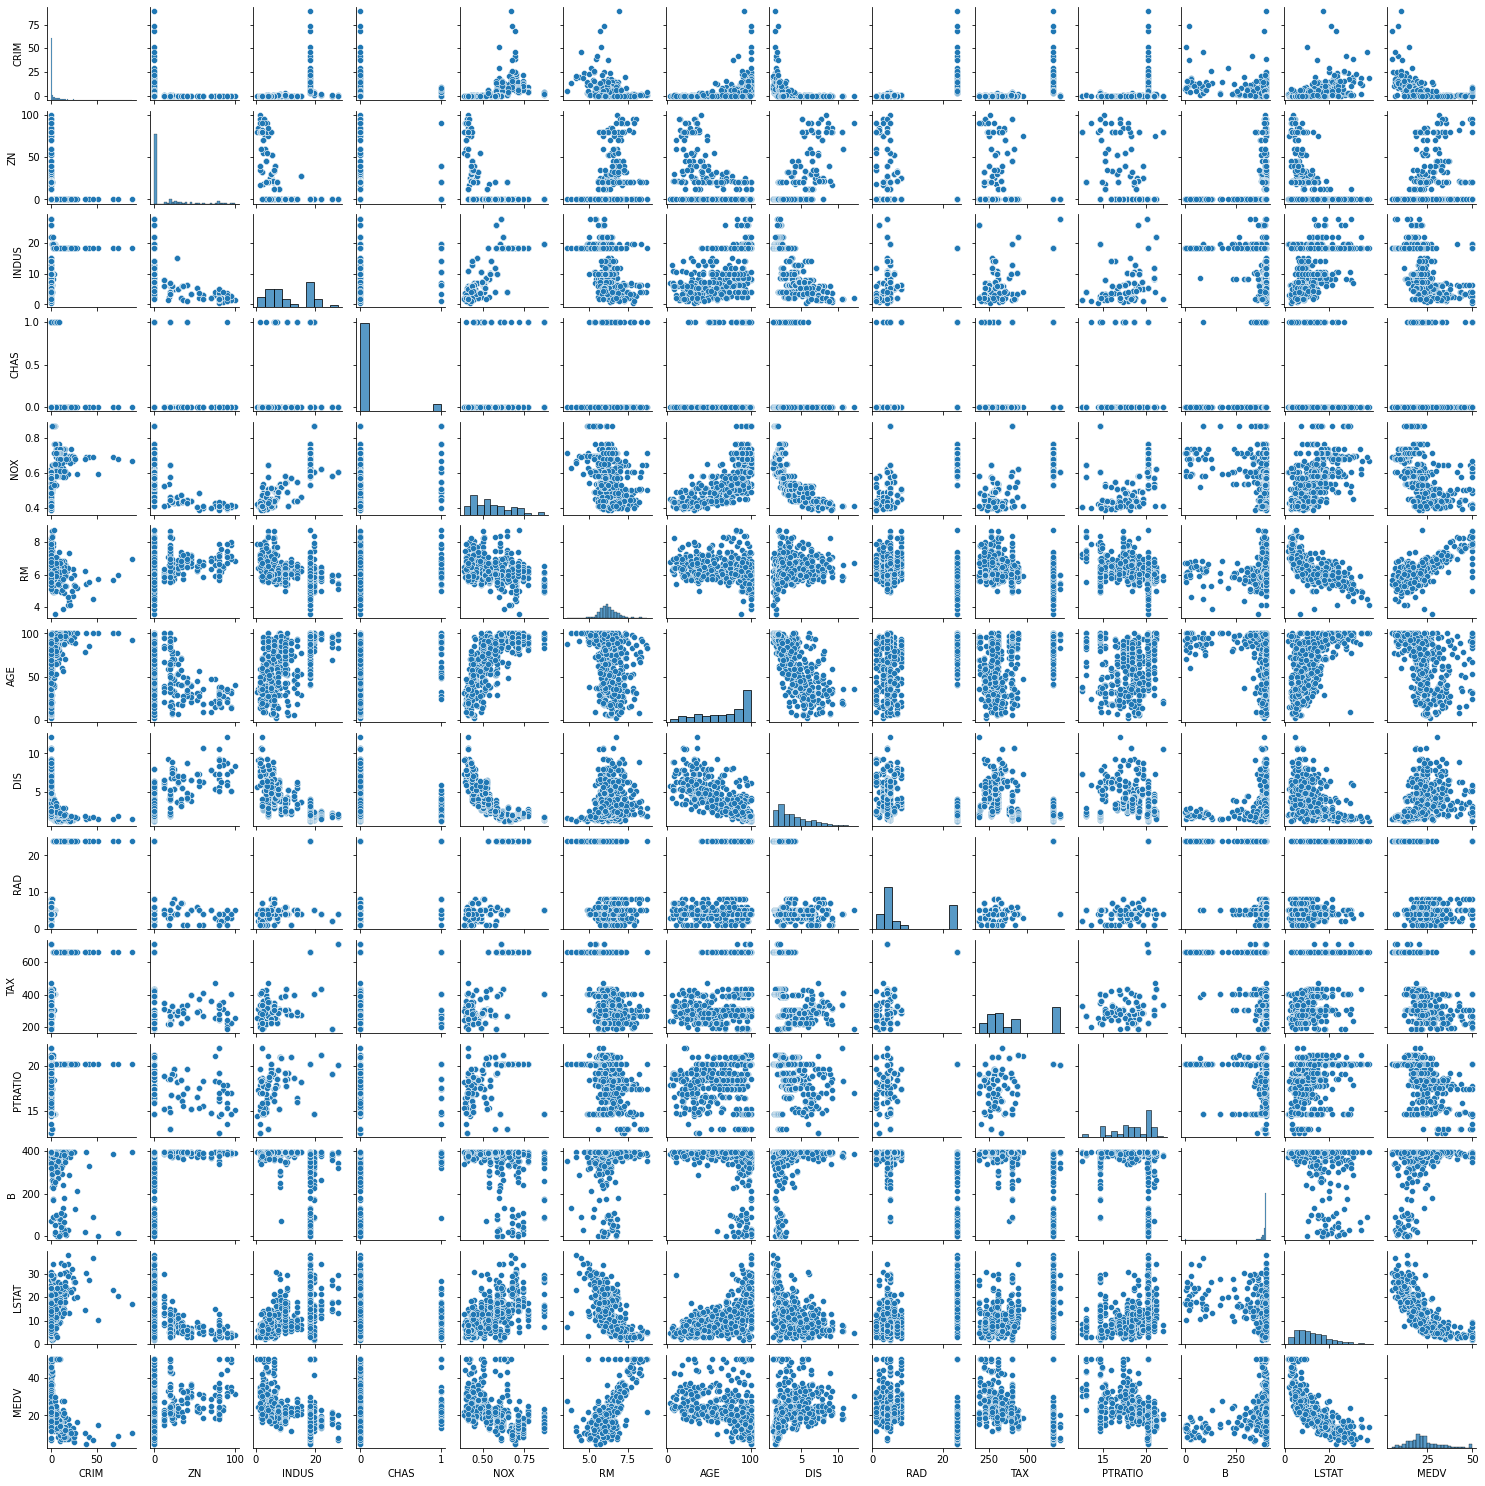

In [16]:
sns.pairplot(df, height = 1.5);
plt.show()

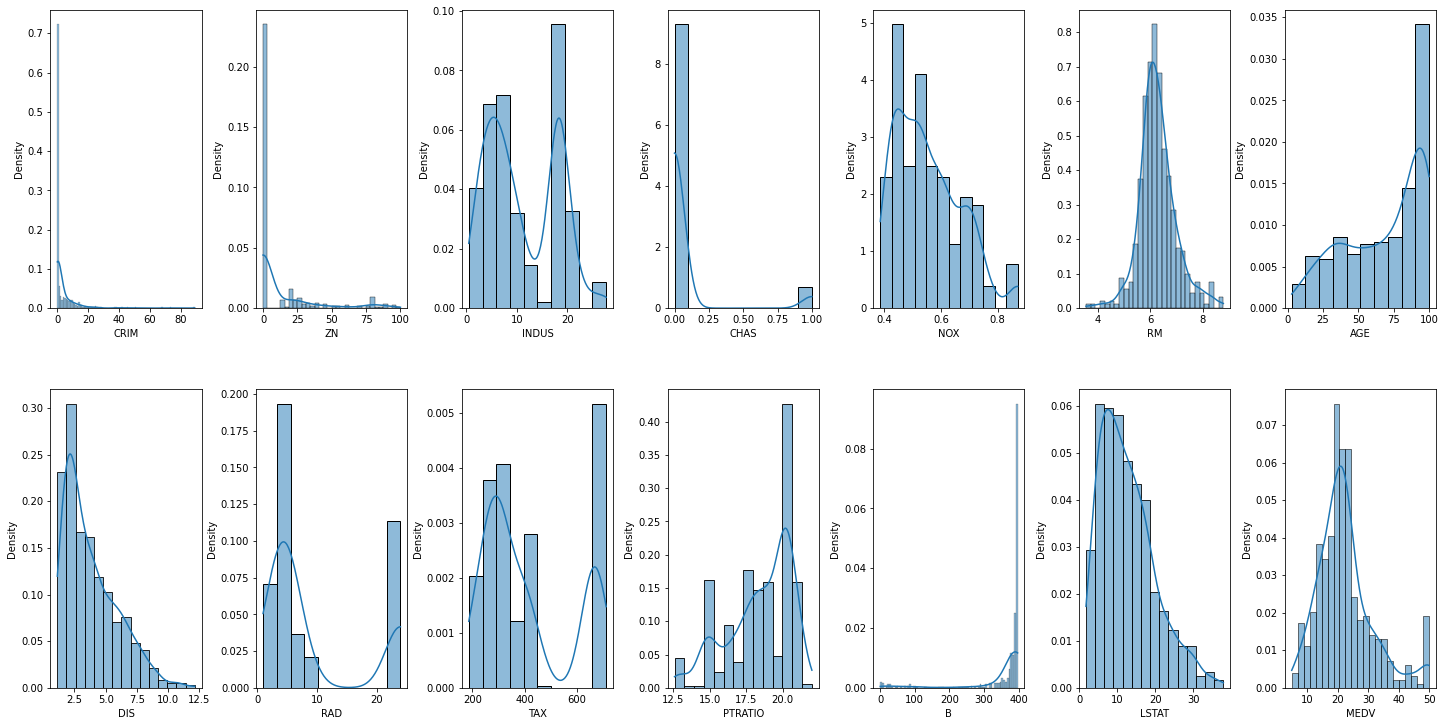

In [17]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.histplot(v, ax = axs[index], kde = True, stat = "density")
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

In [18]:
col_study = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM']

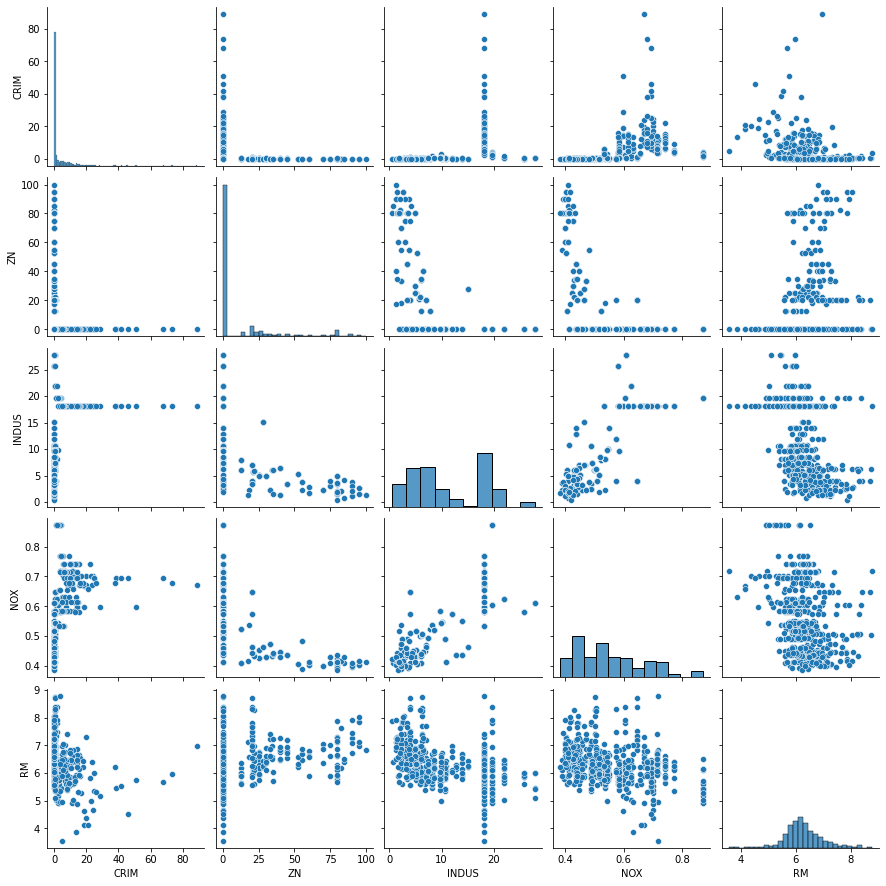

In [19]:
sns.pairplot(df[col_study], height = 2.5);
plt.show()

| Code   | Description   |
|:---|:---|
|**CRIM** | per capita crime rate by town |
|**ZN**  | proportion of residential land zoned for lots over 25,000 sq.ft. | 
|**INDUS**  | proportion of non-retail business acres per town | 
|**CHAS**  | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) | 
|**NOX**  | nitric oxides concentration (parts per 10 million) | 
|**RM**  | average number of rooms per dwelling | 
|**AGE**  | proportion of owner-occupied units built prior to 1940 | 
|**DIS**  | weighted distances to five Boston employment centres | 
|**RAD**  | index of accessibility to radial highways | 
|**TAX**  | full-value property-tax rate per $10,000 | 
|**PTRATIO**  | pupil-teacher ratio by town | 
|**B**  | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town | 
|**LSTAT**  | % lower status of the population | 
|**MEDV**  | Median value of owner-occupied homes in \$1000's | 

In [20]:
col_study = ['PTRATIO', 'B', 'LSTAT', 'MEDV']

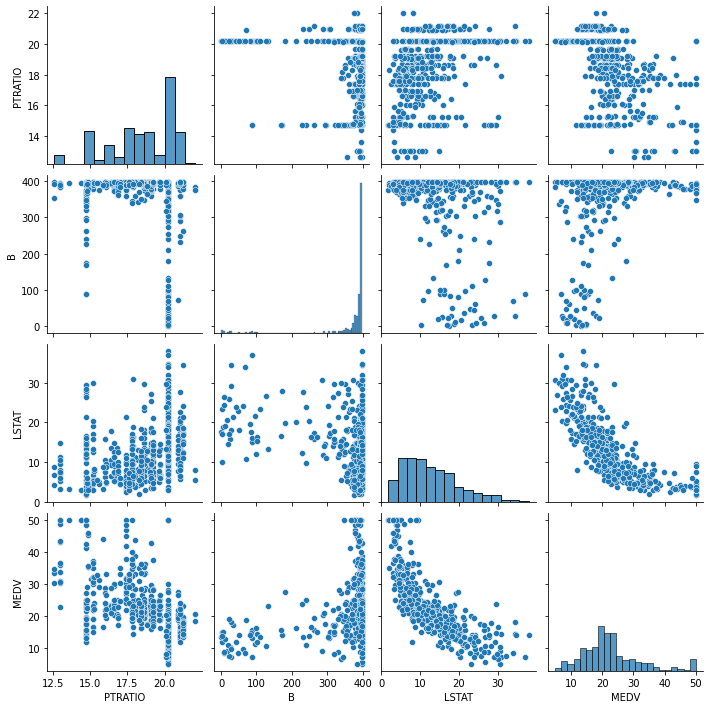

In [21]:
sns.pairplot(df[col_study], height=2.5);
plt.show()

- **If we decide to remove the variables 'ZN' and 'CHAS' form dataset**

In [22]:
#df = df.drop(['ZN', 'CHAS'], axis = 1)

- **Checking null values**

There are no null values in our dataset

In [23]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

***

## <font color='blue'> Checking and Treating Outliers (Percentage and aAmount) in the Dataset</font>

- **Plotting boxplots to see if there are any outliers**

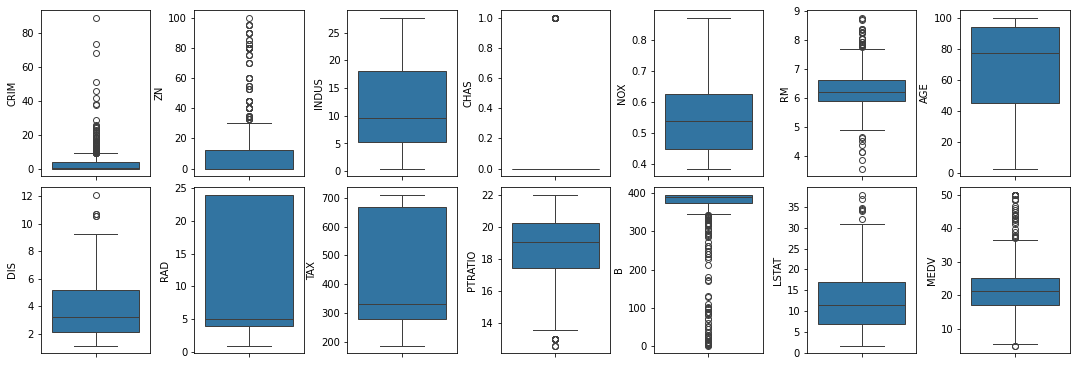

In [24]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (15, 5))
ax = ax.flatten()
index = 0
for i in df.columns:
  sns.boxplot(y = i, data = df, ax = ax[index])
  index += 1
plt.tight_layout(pad = 0.4)
plt.show()

The columns CRIM, ZN, CHAS, RM, DIS, PTRATIO, B, LSTAT and MEDV have outliers.

In [25]:
for i in df.columns:
  df.sort_values(by = i, ascending = True, na_position = 'last')
  q1, q3 = np.nanpercentile(df[i], [25, 75])
  iqr = q3-q1
  lower_bound = q1-(1.5*iqr)
  upper_bound = q3+(1.5*iqr)
  outlier_df = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_df.count()/df[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_df.count()))

Outliers in CRIM is 13.04% with count 66
Outliers in ZN is 13.44% with count 68
Outliers in INDUS is 0.00% with count 0
Outliers in CHAS is 6.92% with count 35
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


- The variable 'CRIM', 'ZN' and 'B' have high percentage of outlier data which can adversely affect the accuracy of our model.
- To get rid of this we can either drop the observations or replace with some apporach like mean or median.
- But dropping all the outlier observations is not a good idea as we will be left with very fewer observations due to higher percentage of outliers to train our model on, also if we replace such a big percentage of the outliers with some approach (mean, median...etc.) then it might result into less accurate or biased model.
- We can use an alternative : let's drop the extreme outliers and replace the remaning by some approach (mean, median.....etc.) and let's remove the variables 'ZN' and 'CHAS'.

In [26]:
df = df.drop(['ZN', 'CHAS'], axis = 1)

We created a copy of our dataset

In [27]:
df_c = df.copy() 

- **Removing extreme outliers form B and CRIM (removing those observations)**

In [28]:
for i in df_c.columns:
  df_c.sort_values(by = i, ascending = True, na_position = 'last')
  q1, q3 = np.nanpercentile(df_c[i], [25, 75])
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  outlier_df_c = df_c[i][(df_c[i] < lower_bound) | (df_c[i] > upper_bound)] #creating a series of outlier data
  perc = (outlier_df_c.count()/df_c[i].count())*100
  print('Outliers in %s is %.2f%% with count %.f' %(i, perc, outlier_df_c.count()))
  
  if i == 'B':
    outlierDFB_index = outlier_df_c.index
    outlierDFB_LB = df_c[i][(df_c[i] < lower_bound)]
    outlierDFB_UB = df_c[i][(df_c[i] > upper_bound)]
  elif i == 'CRIM':
    outlierDFCRIM_index = outlier_df_c.index
    outlierDFCRIM_LB = df_c[i][(df_c[i] < lower_bound)]
    outlierDFCRIM_UB = df_c[i][(df_c[i] > upper_bound)]
  elif i == 'MEDV':
    lowerBoundMEDV = lower_bound
    upperBoundMEDV = upper_bound

Outliers in CRIM is 13.04% with count 66
Outliers in INDUS is 0.00% with count 0
Outliers in NOX is 0.00% with count 0
Outliers in RM is 5.93% with count 30
Outliers in AGE is 0.00% with count 0
Outliers in DIS is 0.99% with count 5
Outliers in RAD is 0.00% with count 0
Outliers in TAX is 0.00% with count 0
Outliers in PTRATIO is 2.96% with count 15
Outliers in B is 15.22% with count 77
Outliers in LSTAT is 1.38% with count 7
Outliers in MEDV is 7.91% with count 40


In [29]:
removed = []
outlierDFB_LB.sort_values(ascending = True, inplace = True)
outlierDFB_UB.sort_values(ascending = False, inplace = True)
counter = 1

for i in outlierDFB_LB.index:
  if counter <= 19:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)
      
for i in outlierDFB_UB.index:
  if counter <= 38:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)
      
for i in outlierDFB_LB.index:
  if counter <= 38 and i not in removed:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)

outlierDFCRIM_LB.sort_values(ascending = True, inplace = True)
outlierDFCRIM_UB.sort_values(ascending = False, inplace = True)
counter = 1

for i in outlierDFCRIM_LB.index:
  if counter <= 16 and i not in removed:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)
      
for i in outlierDFCRIM_UB.index:
  if counter <= 33 and i not in removed:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)
      
for i in outlierDFCRIM_LB.index:
  if counter <= 33 and i not in removed:
    df_c.drop(index = i, inplace = True)
    counter += 1
    removed.append(i)

df_c.shape

(435, 12)

- We have dropped 71 observations from our dataset, now we are left with 435 observations and 12 columns.
- Now, let's replace the remaning outliers with mean of each variable.

In [30]:
# We created, again, a copy of our dataset
df_c1 = df_c.copy()

In [31]:
for i in df.columns:
  df.sort_values(by = i, ascending = True, na_position = 'last')
  q1, q3 = np.nanpercentile(df[i], [25, 75])
  iqr = q3 - q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  mean = df_c1[i].mean()
  if i != 'MEDV':
    df_c1.loc[df_c1[i] < lower_bound, [i]] = mean
    df_c1.loc[df_c1[i] > upper_bound, [i]] = mean
  else:
    df_c1.loc[df_c1[i] < lower_bound, [i]] = mean
    df_c1.loc[df_c1[i] > upper_bound, [i]] = 50

/tmp/ipykernel_733310/4252032358.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.409195402298851' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c1.loc[df_c1[i] < lower_bound, [i]] = mean


In [32]:
df_c1.describe()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,1.054293,10.008575,0.534257,6.266477,64.741609,4.038049,7.409195,369.232184,18.402521,388.243160,11.128671,24.502299
std,1.936962,6.741091,0.108957,0.511640,28.319794,1.960932,7.185681,146.359443,1.945860,10.759893,5.973657,9.616602
min,0.006320,0.460000,0.385000,4.903000,2.900000,1.129600,1.000000,187.000000,13.600000,344.910000,1.730000,6.300000
25%,0.068740,4.860000,0.445000,5.926500,40.050000,2.404500,4.000000,276.000000,17.400000,382.557563,6.545000,18.900000
50%,0.173310,8.140000,0.515000,6.230000,70.200000,3.665000,5.000000,307.000000,18.600000,392.520000,9.970000,22.200000
75%,0.846290,18.100000,0.585000,6.550500,91.550000,5.400900,6.000000,403.000000,20.200000,396.260000,14.655000,27.100000
max,8.982960,27.740000,0.871000,7.691000,100.000000,9.222900,24.000000,711.000000,22.000000,396.900000,30.810000,50.000000


***

## <font color='blue'> Correlation Analysis and Feature Selection</font>

In [33]:
pd.options.display.float_format = '{:,.2f}'.format

In [34]:
df_c1.corr()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.54,0.62,-0.14,0.42,-0.43,0.84,0.77,0.28,-0.21,0.32,-0.19
INDUS,0.54,1.00,0.73,-0.38,0.60,-0.65,0.49,0.66,0.28,-0.22,0.54,-0.38
NOX,0.62,0.73,1.00,-0.30,0.71,-0.75,0.55,0.62,0.19,-0.22,0.52,-0.29
RM,-0.14,-0.38,-0.30,1.00,-0.25,0.23,-0.07,-0.19,-0.19,0.09,-0.61,0.56
AGE,0.42,0.60,0.71,-0.25,1.00,-0.71,0.35,0.42,0.25,-0.13,0.56,-0.26
DIS,-0.43,-0.65,-0.75,0.23,-0.71,1.00,-0.38,-0.45,-0.25,0.15,-0.39,0.11
RAD,0.84,0.49,0.55,-0.07,0.35,-0.38,1.00,0.86,0.37,-0.18,0.28,-0.17
TAX,0.77,0.66,0.62,-0.19,0.42,-0.45,0.86,1.00,0.36,-0.20,0.38,-0.30
PTRATIO,0.28,0.28,0.19,-0.19,0.25,-0.25,0.37,0.36,1.00,0.04,0.29,-0.38
B,-0.21,-0.22,-0.22,0.09,-0.13,0.15,-0.18,-0.20,0.04,1.00,-0.11,-0.00


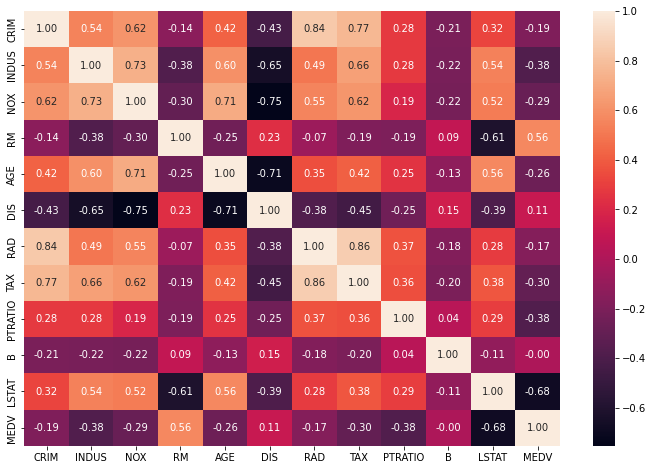

In [35]:
plt.figure(figsize = (12,8))
sns.heatmap(df_c1.corr(), annot = True, fmt = ".2f")
plt.show()

- **Selecting the features which can predict MEDV the best**

1. let's use the p-value to select the optimal features.
2. let's drop all the variables whose p-value is less than significance level of 0.05 using backward elimination method.

In [36]:
import statsmodels.api as sm

In [37]:
#independent variable(X) and dependent variable(Y)
X = df_c1.iloc[:, :-1]
Y = df_c1.iloc[:, 11]

#Feature selection using p-value with backward elimination

def BackwardElimination(sl, w):
    for i in range(0, len(w.columns)):
        regressor_OLS = sm.OLS(endog = Y, exog = w).fit()
        max_pvalue = max(regressor_OLS.pvalues)
        pvalues = regressor_OLS.pvalues
        if max_pvalue > sl:
            index_max_pvalue = pvalues[pvalues == max_pvalue].index
            w = w.drop(index_max_pvalue, axis = 1) # delete the variable for which p_value > sl
    return w, pvalues, index_max_pvalue

SL = 0.05
ones = np.ones((435,1))  # adding a columns of ones to X as it is required by statsmodels library
W = X
W.insert(0, 'Constant', ones, True)
W_optimal = W.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,11]]

W_optimal, pvalues, index_max_pvalue = BackwardElimination(SL, W_optimal)
X = W_optimal.drop('Constant', axis = 1)

In [38]:
# Remaning variabls after backward elimination
X.columns

Index(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='object')

- Using Pearson correlation to remove any highly correlated independent variables to avoid multicollinearity

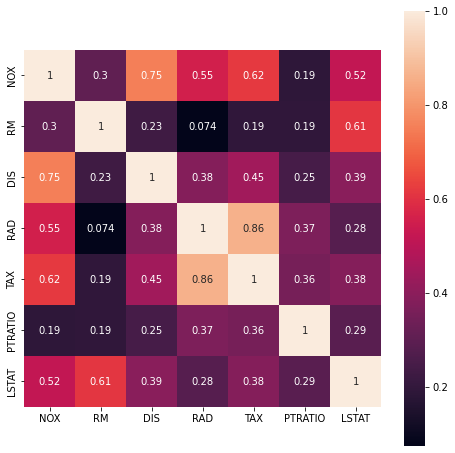

In [39]:
#Ploting heatmap using pearson correlation among independent variables
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(method = 'pearson').abs(), annot = True, square = True)
plt.show()

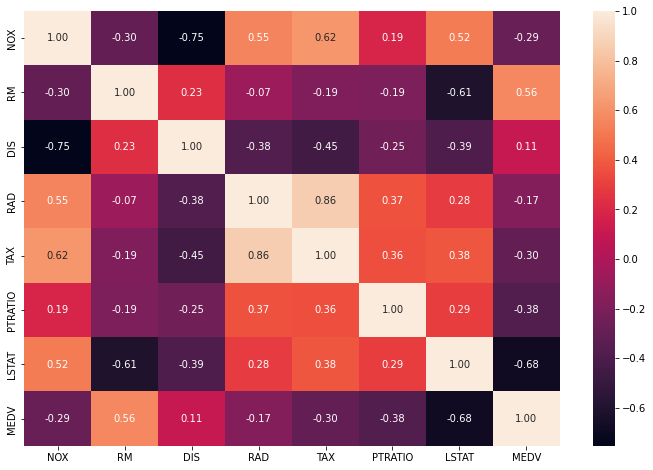

In [40]:
plt.figure(figsize = (12,8))
sns.heatmap(df_c1[['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']].corr(), annot = True, fmt = ".2f")
plt.show()

- From above correlation heatmap we can see that:

1. TAX and RAD are highly correlated with score 0.86. As an apparent presumption, we can state that the variable RAD (index of accessibility to radial highways) will be more important in predicting MEDV as commpared to TAX (full-value property-tax rate per $10,000), so let's consider to drop TAX.
2. DIS and NOX are highly correlated with score 0.75. As an apparent presumption, we can state that the variable DIS (weighted distances to five Boston employment centres) will be more important in predicting MEDV as commpared to NOX (nitric oxides concentration (parts per 10 million)), so let's consider to drop NOX

In [41]:
#dropping TAX and NOX
X.drop('TAX', axis = 1, inplace = True)
X.drop('NOX', axis = 1, inplace = True)

#remaning columns after removing multicollinearity
X.columns

Index(['RM', 'DIS', 'RAD', 'PTRATIO', 'LSTAT'], dtype='object')

- Checking correlation of remaning independent variables with MEDV using Pearson correlation method.

In [42]:
# Checking correlation of each variable with MEDV by pearson method
from scipy.stats import pearsonr

for i in X.columns:
  corr, _ = pearsonr(X[i], Y)
  print(i, round(corr, 2))

RM 0.56
DIS 0.11
RAD -0.17
PTRATIO -0.38
LSTAT -0.68


- let's drop the variables with least correlation with MEDV
- We can see that DIS and RAD are least correlated to MEDV, so dropping DIS and RAD

In [43]:
X.drop(['DIS', 'RAD'], axis = 1, inplace = True)

In [44]:
# Remaning variables/ features that can predict the MEDV most
X.columns

Index(['RM', 'PTRATIO', 'LSTAT'], dtype='object')

- From the above feature selection process we conclude that features RM, PTRATIO and LSAT can predict MEDV in the best way

In [45]:
import matplotlib as mpl
print(mpl.__version__)

3.9.2


***

## <font color='blue'> Linear Regression with Scikit-Learn</font>

***

Below is from Jacob T. VanderPlas text, *`Python Data Science Handbook: Essential Tools for Working with Data`*

Basics of the API:

Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow):

1. Choose a class of model by importing the appropriate estimator class from Scikit- Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the model to new data:
   * For supervised learning, often we predict labels for unknown data using the predict() method.
   * For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

***

In [46]:
df.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.01,2.31,0.54,6.58,65.20,4.09,1,296.00,15.30,396.90,4.98,24.00
1,0.03,7.07,0.47,6.42,78.90,4.97,2,242.00,17.80,396.90,9.14,21.60
2,0.03,7.07,0.47,7.18,61.10,4.97,2,242.00,17.80,392.83,4.03,34.70
3,0.03,2.18,0.46,7.00,45.80,6.06,3,222.00,18.70,394.63,2.94,33.40
4,0.07,2.18,0.46,7.15,54.20,6.06,3,222.00,18.70,396.90,5.33,36.20


In [47]:
df.shape

(506, 12)

In [48]:
df_f = df_c1[['RM', 'PTRATIO', 'LSTAT', 'MEDV']]
df_f.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.58,15.30,4.98,24.00
1,6.42,17.80,9.14,21.60
2,7.18,17.80,4.03,34.70
3,7.00,18.70,2.94,33.40
4,7.15,18.70,5.33,36.20


In [49]:
df_f.shape

(435, 4)

In [50]:
# Step 1: Selecting a model
from sklearn.linear_model import LinearRegression

In [51]:
# Step 2: Instantiation
model = LinearRegression()

In [52]:
# Step 3: Arrange data
X = df_f['RM'].values.reshape(-1,1)

In [53]:
# Step 3: Arrange data
y = df_f['MEDV'].values

In [54]:
# Step 4: Model fitting
model.fit(X, y)

LinearRegression()

In [55]:
model.coef_

array([10.56229347])

In [56]:
model.intercept_

-41.686069029162994

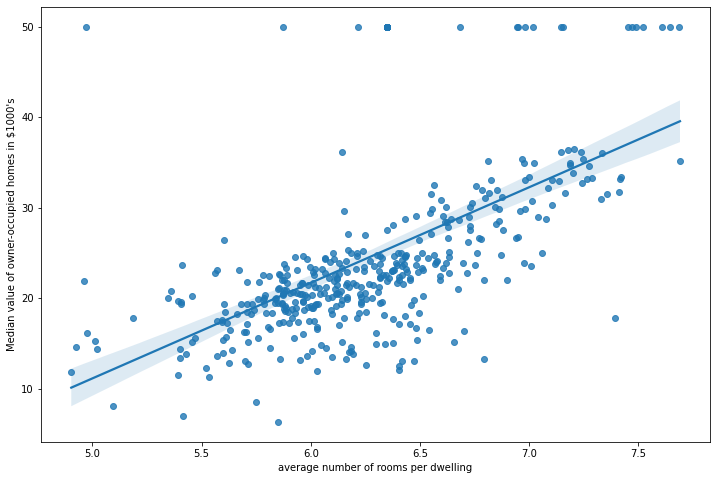

In [57]:
plt.figure(figsize=(12,8));
sns.regplot(x = X, y = y);
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

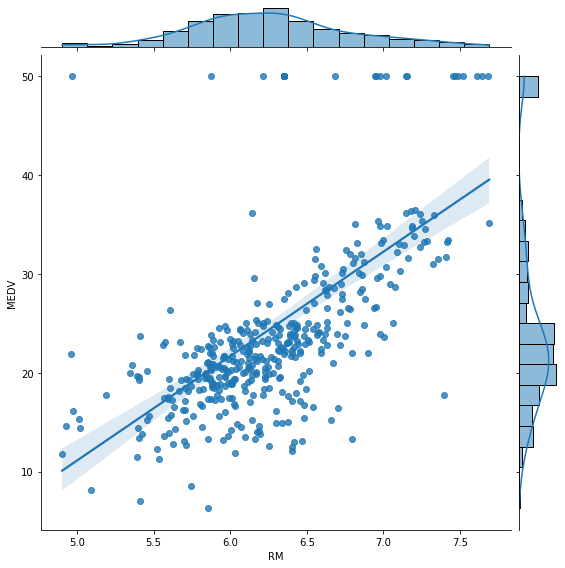

In [58]:
sns.jointplot(x = 'RM', y = 'MEDV', data = df_f, kind = 'reg', height = 8, ratio = 10);
plt.show();

In [59]:
# Step 5: Predict
model.predict(np.array([7]).reshape(1,-1))

array([32.24998529])

***

In [60]:
# Step 1: Selecting a model

# Step 2: Instantiation
ml_2 = LinearRegression()

# Step 3: Arrange data
X = df_f['LSTAT'].values.reshape(-1,1)
y = df_f['MEDV'].values

# Step 4: Model fitting
ml_2.fit(X, y)

# Step 5: Predict
ml_2.predict(np.array([15]).reshape(1,-1))

array([20.26859312])

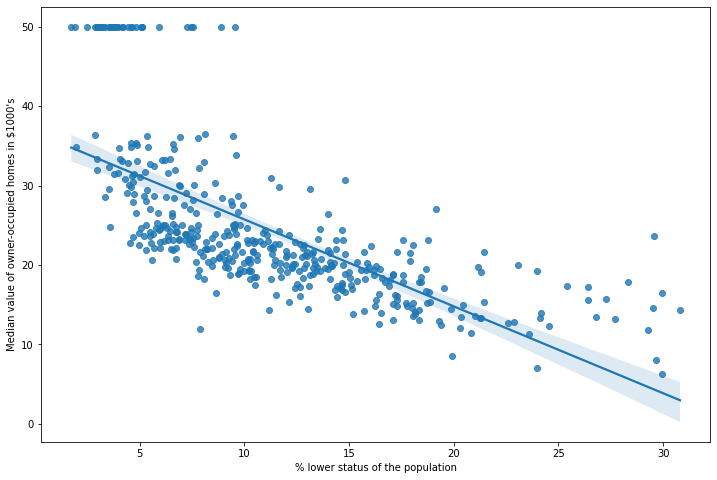

In [61]:
plt.figure(figsize = (12,8));
sns.regplot(x = X, y = y);
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.show();

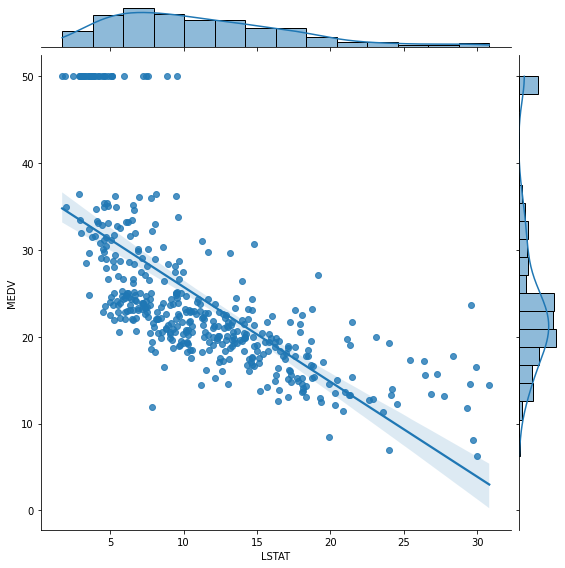

In [62]:
sns.jointplot(x = 'LSTAT', y = 'MEDV', data = df_f, kind = 'reg', height = 8, ratio = 10);
plt.show();

***

## <font color='blue'> Robust Regression</font>

Outlier Demo: [http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html](http://digitalfirst.bfwpub.com/stats_applet/stats_applet_5_correg.html)

In [63]:
df_f.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.58,15.30,4.98,24.00
1,6.42,17.80,9.14,21.60
2,7.18,17.80,4.03,34.70
3,7.00,18.70,2.94,33.40
4,7.15,18.70,5.33,36.20


## <font color='blue'> RANdom SAmple Consensus (RANSAC) Algorithm</font>

link = [http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression](http://scikit-learn.org/stable/modules/linear_model.html#ransac-regression)

Each iteration performs the following steps:

1. Select `min_samples` random samples from the original data and check whether the set of data is valid (see `is_data_valid`).

2. Fit a model to the random subset (`base_estimator.fit`) and check whether the estimated model is valid (see `is_model_valid`).

3. Classify all data as inliers or outliers by calculating the residuals to the estimated model (`base_estimator.predict(X) - y`) - all data samples with absolute residuals smaller than the `residual_threshold` are considered as inliers.

4. Save fitted model as best model if number of inlier samples is maximal. In case the current estimated model has the same number of inliers, it is only considered as the best model if it has better score.

In [64]:
X = df_f['RM'].values.reshape(-1,1)
y = df_f['MEDV'].values

In [65]:
from sklearn.linear_model import RANSACRegressor

In [66]:
ransac = RANSACRegressor()

In [67]:
ransac.fit(X, y)

RANSACRegressor()

In [68]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

In [69]:
np.arange(3, 10, 1)

array([3, 4, 5, 6, 7, 8, 9])

In [70]:
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

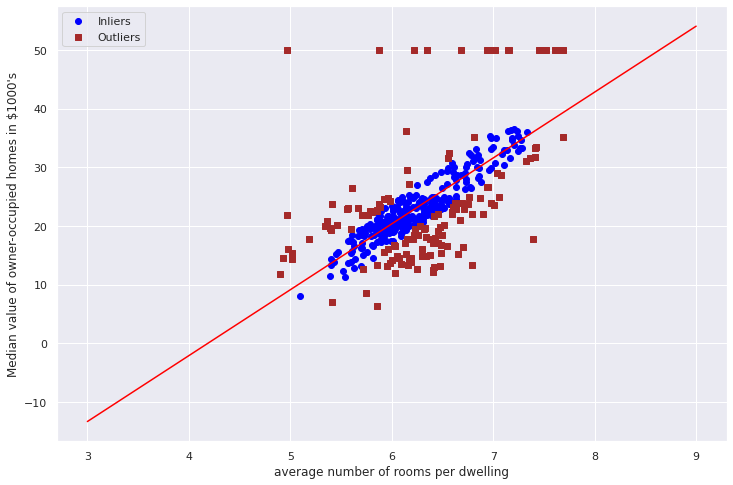

In [71]:
sns.set(style = 'darkgrid', context = 'notebook')
plt.figure(figsize = (12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c = 'blue', marker = 'o', label = 'Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c = 'brown', marker = 's', label = 'Outliers')
plt.plot(line_X, line_y_ransac, color = 'red')
plt.xlabel('average number of rooms per dwelling')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc = 'upper left')
plt.show()

In [72]:
ransac.estimator_.coef_

array([11.23426603])

In [73]:
ransac.estimator_.intercept_

-47.06428136104128

***

In [74]:
X = df['LSTAT'].values.reshape(-1,1)
y = df['MEDV'].values
ransac.fit(X, y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(0, 40, 1)
line_y_ransac = ransac.predict(line_X.reshape(-1, 1))

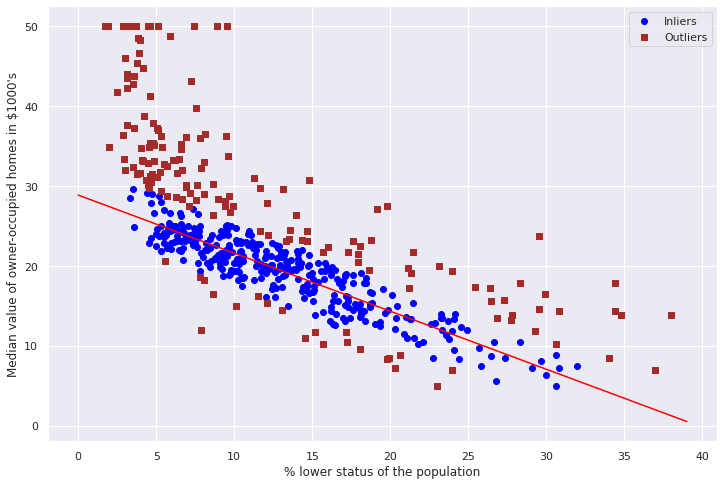

In [75]:
sns.set(style='darkgrid', context='notebook')
plt.figure(figsize=(12,8));
plt.scatter(X[inlier_mask], y[inlier_mask], 
            c='blue', marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='brown', marker='s', label='Outliers')
plt.plot(line_X, line_y_ransac, color='red')
plt.xlabel('% lower status of the population')
plt.ylabel("Median value of owner-occupied homes in $1000's")
plt.legend(loc='upper right')
plt.show()

***

## <font color='blue'> Performance Evaluation of Regression Model</font>

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df_f.head()

,RM,PTRATIO,LSTAT,MEDV
0,6.58,15.30,4.98,24.00
1,6.42,17.80,9.14,21.60
2,7.18,17.80,4.03,34.70
3,7.00,18.70,2.94,33.40
4,7.15,18.70,5.33,36.20


In [78]:
#X = df['LSTAT'].values.reshape(-1,1)
X = df_f.iloc[:, :-1].values

In [79]:
y = df_f['MEDV'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(X_train, y_train)

LinearRegression()

In [83]:
y_train_pred = lr.predict(X_train)

In [84]:
y_test_pred = lr.predict(X_test)

In [85]:
Y_pred = lr.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,24.30,30.99
1,20.70,21.07
2,18.90,17.58
3,25.00,25.98
4,17.50,17.81


***

## <font color='blue'> Method 1: Residual Analysis</font>

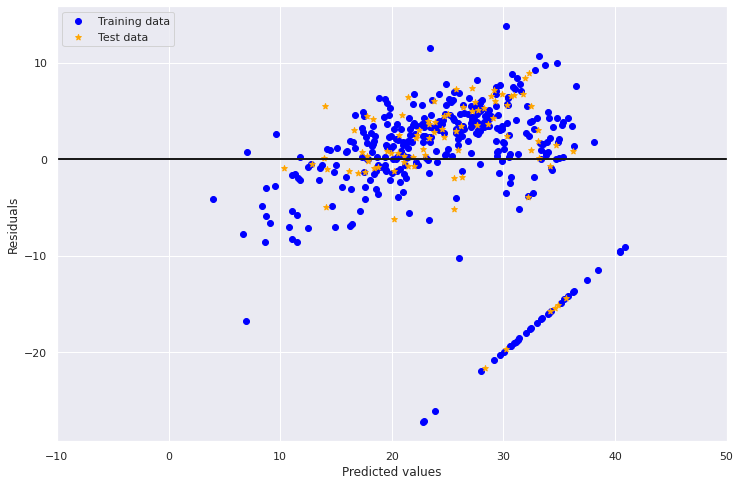

In [86]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'blue', marker = 'o', label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'orange', marker = '*', label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'k')
plt.xlim([-10, 50])
plt.show()

***

## <font color='blue'> Method 2: Mean Squared Error (MSE)</font>

$$MSE=\frac{1}{n}\sum^n_{i=1}(y_i-\hat{y}_i)^2$$

* The average value of the Sums of Squared Error cost function  

* Useful for comparing different regression models 

* For tuning parameters via a grid search and cross-validation

In [87]:
from sklearn.metrics import mean_squared_error

In [88]:
mean_squared_error(y_train, y_train_pred)

45.25228605108445

In [89]:
mean_squared_error(y_test, y_test_pred)

35.43557986928063

## <font color='blue'> Method 3: Coefficient of Determination, $R^2$</font>

$$R^2 = 1 - \frac{SSE}{SST}$$

SSE: Sum of squared errors

SST: Total sum of squares

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(y_train, y_train_pred)

0.5276335399133203

In [92]:
r2_score(y_test, y_test_pred)

0.5433176442199399

***

## <font color='blue'> What does a Near Perfect Model Looks like?</font>

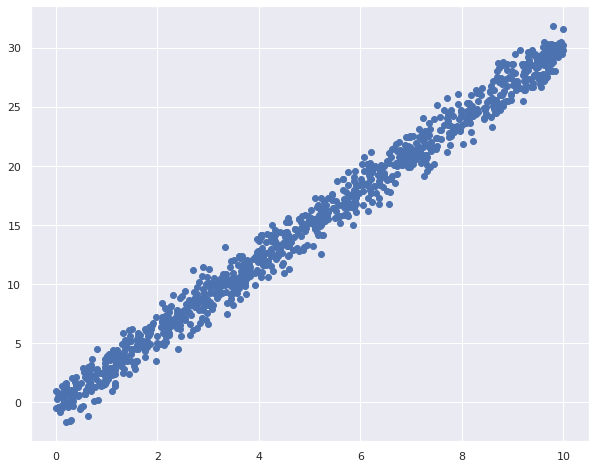

In [93]:
generate_random = np.random.RandomState(0)
x = 10 * generate_random.rand(1000)
y = 3 * x + np.random.randn(1000)
plt.figure(figsize = (10, 8))
plt.scatter(x, y);
plt.show()

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [96]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X_train.reshape(-1, 1), y_train)


y_train_pred = model.predict(X_train.reshape(-1, 1))
y_test_pred = model.predict(X_test.reshape(-1, 1))

## <font color='blue'> Method 1: Residual Analysis</font>

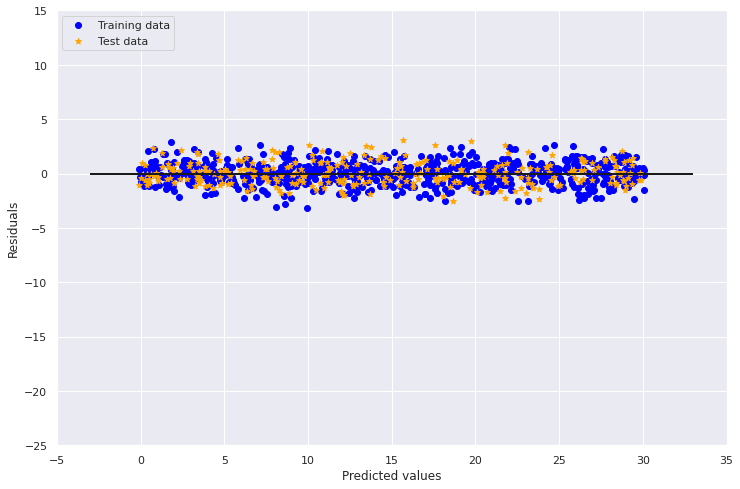

In [97]:
plt.figure(figsize=(12,8))
plt.scatter(y_train_pred, y_train_pred - y_train, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='orange', marker='*', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-3, xmax=33, lw=2, color='k')
plt.xlim([-5, 35])
plt.ylim([-25, 15])
plt.show()

## <font color='blue'> Method 2: Mean Squared Error (MSE)</font>

In [98]:
mean_squared_error(y_train, y_train_pred)

1.053490690688666

In [99]:
mean_squared_error(y_test, y_test_pred)

1.1255820004546702

## <font color='blue'> Method 3: Coefficient of Determination, $R^2$</font>

In [100]:
r2_score(y_train, y_train_pred)

0.9864280918706674

In [101]:
r2_score(y_test, y_test_pred)

0.9857596740889996

***

## <font color='blue'> Yet to be covered</font>

* Mean Absolute Error
* Stratified Shuffle Split
* Feature Engineering. E.g., Combining Features, Designing derivative features
* Data preparation. E.g., missing values etc.
* Categorical features
* Transform data / feature scaling. Scikit-learn Pipeline
* Fine Tuning. E.g., Grid Search, Randomized Search
* Ensemble Methods


***

## <font color='blue'> Comparison of Machine Learning Methods</font>

In [102]:
from sklearn.linear_model import LinearRegression as lr
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score as cvs

In [103]:
X = df_f.iloc[:, :-1].values
y = df_f['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### <font color='blue'> Linear Regression Model:</font>

In [104]:
linear = lr()
linear.fit(X_train, y_train)
Y_pred = linear.predict(X_test)
Y_compare_linear = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_linear.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,24.30,30.99
1,20.70,21.07
2,18.90,17.58
3,25.00,25.98
4,17.50,17.81


### <font color='blue'> Polynomial Regression Model:</font>

In [105]:
polyRegressor = PolynomialFeatures(degree = 3)
X_train_poly = polyRegressor.fit_transform(X_train)
X_test_poly = polyRegressor.fit_transform(X_test)
poly = lr()
poly.fit(X_train_poly, y_train)
Y_pred = poly.predict(X_test_poly)
Y_compare_poly = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_poly.head() #displaying the comparision between actual and predicted values of MEDV

,Actual,Predicted
0,24.30,32.86
1,20.70,19.67
2,18.90,15.95
3,25.00,23.71
4,17.50,18.33


### <font color='blue'> Support Vector Regression Model:</font>

In [106]:
svr = SVR(kernel = 'poly', gamma = 'scale')
svr.fit(X_train, y_train)
Y_pred = svr.predict(X_test)
Y_compare_svr = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_svr.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,24.30,26.30
1,20.70,19.60
2,18.90,15.84
3,25.00,24.12
4,17.50,17.34


### <font color='blue'> Decission Tree Regression Model:</font>

In [107]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
Y_pred = rf.predict(X_test)
Y_compare_randomforrest = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_randomforrest.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,24.30,22.24
1,20.70,21.82
2,18.90,17.71
3,25.00,24.04
4,17.50,20.94


### <font color='blue'> K-Nearest Neighbour regression model:</font>

In [108]:
knn = KNeighborsRegressor(n_neighbors = 13)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
Y_compare_knn = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})
Y_compare_knn.head() #displaying the comparision btween actual and predicted values of MEDV

,Actual,Predicted
0,24.30,30.53
1,20.70,20.35
2,18.90,18.65
3,25.00,22.38
4,17.50,19.32


### <font color='blue'> Plotting Compariasion</font>
- Plotting compariasion of actual and predicted values of **MEDV** that we got using different machine learning models.

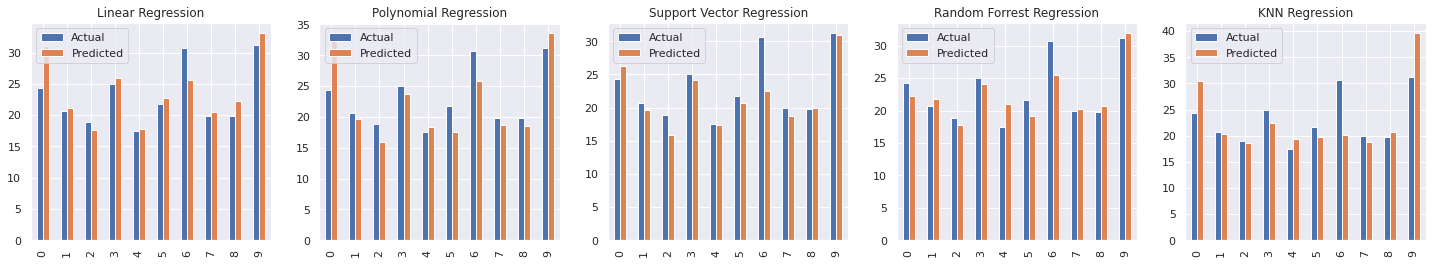

In [109]:
fig, ax = plt.subplots(ncols = 5, nrows = 1, figsize = (25, 4))
ax = ax.flatten()
Y_compare_linear.head(10).plot(kind = 'bar', title = 'Linear Regression', grid = True, ax = ax[0])
Y_compare_poly.head(10).plot(kind = 'bar', title='Polynomial Regression', grid = True, ax = ax[1])
Y_compare_svr.head(10).plot(kind = 'bar', title='Support Vector Regression', grid = True, ax = ax[2])
Y_compare_randomforrest.head(10).plot(kind = 'bar', title='Random Forrest Regression', grid = True, ax = ax[3])
Y_compare_knn.head(10).plot(kind = 'bar', title = 'KNN Regression', grid = True, ax = ax[4])
plt.show()

### <font color='blue'> Scores (R Squared)</font>
- Scores (R squared) of different machine learning models using Train-Test Split.

In [110]:
print('According to R squared scorring method we got below scores for out machine learning models:')
modelNames = ['Linear', 'Polynomial', 'Support Vector', 'Random Forrest', 'K-Nearest Neighbour']
modelRegressors = [linear, poly, svr, rf, knn]
models = pd.DataFrame({'modelNames' : modelNames, 'modelRegressors' : modelRegressors})
counter = 0
score = []
for i in models['modelRegressors']:
  if i is poly:
    accuracy = cvs(i, X_train_poly, y_train, scoring = 'r2', cv = 5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter, 0],accuracy.mean()))
    score.append(accuracy.mean())
  else:
    accuracy = cvs(i, X_train, y_train, scoring = 'r2', cv = 5)
    print('Accuracy of %s Regression model is %.2f' %(models.iloc[counter, 0],accuracy.mean()))
    score.append(accuracy.mean())
  counter += 1

According to R squared scorring method we got below scores for out machine learning models:
Accuracy of Linear Regression model is 0.51
Accuracy of Polynomial Regression model is 0.64
Accuracy of Support Vector Regression model is 0.50
Accuracy of Random Forrest Regression model is 0.72
Accuracy of K-Nearest Neighbour Regression model is 0.64


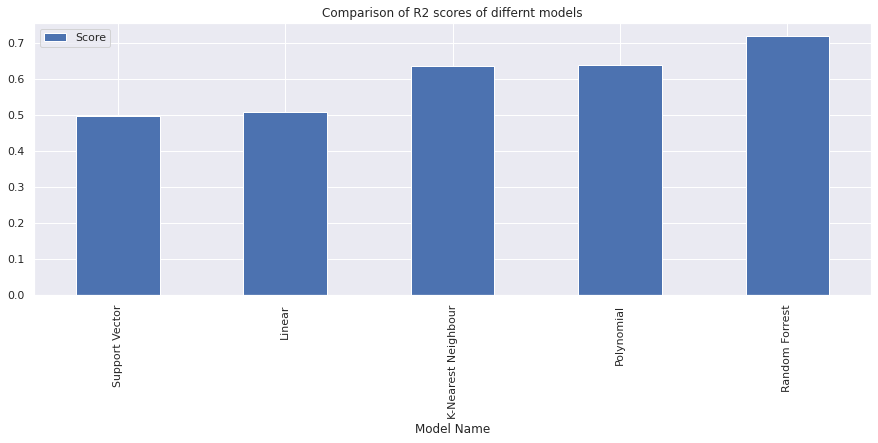

In [111]:
pd.DataFrame({'Model Name' : modelNames, 
              'Score' : score}).sort_values(by = 'Score', ascending = True).plot(x = 0, y = 1, 
                                                                                 kind = 'bar', figsize=(15, 5), 
                                                                                 title='Comparison of R2 scores of differnt models',)
plt.show()

> From the above visualiation we can summarise that Random Forrest (r2 = 0.72) machine learning model gives the best score and we can use it to predict the values of MEDV the best.

> However other models like Polynomial (r2 = 0.64) regression model and KNN (r2 = 0.64) regression model also have comparable score to Random Forrest and hence can also be used to make predictions of MEDV.

### <font color='blue'> Final Summary</font>

From above data engineering and machine learning techniques we can conclude that:

1. Features RM, PTRATIO and LSAT are alone capable of predicting MEDV to a good accuracy.
2. Random Forrest regression model (with 100 estimators) can be considered as a good model for predictiong MEDV using the above mentioned three features.
3. However Polynomial and KNN regression models can also be used as an alternative to Random Forrest.
4. Linear and Support Vector regression models shows the least r2 score, which can be considered bad models for predicting MEDV.
5. Let's remember an important fact: no Data Science technique is perfect and there is always room for improvement.

### <font color='blue'> Extra Methodology</font>

Here we will use K-fold cross validation

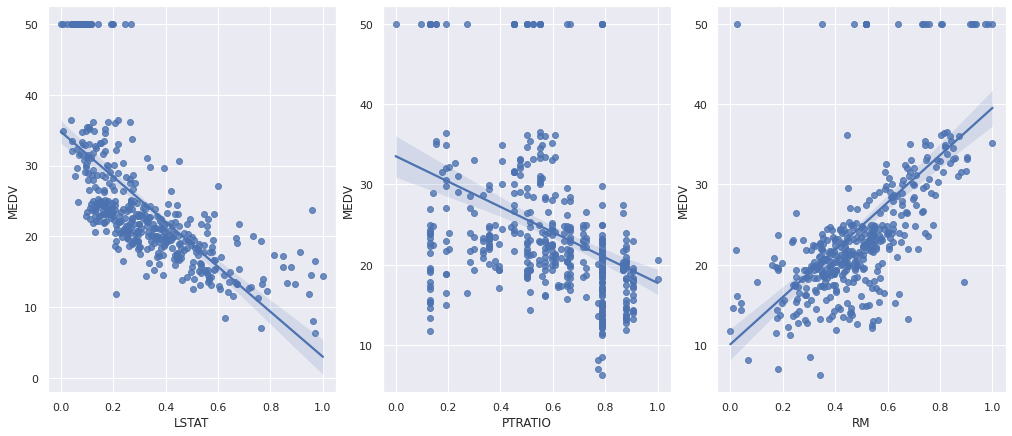

In [112]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'PTRATIO', 'RM']
x = df_f.loc[:, column_sels]
y = df_f['MEDV']
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = column_sels)
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (14, 6))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y = y, x = x[k], ax = axs[i])
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

Let's try to remove the skewness of the data trough log transformation.

In [113]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

In [114]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# k-fold and MinMAxScaler
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

scores_map = {}

# l_regression
l_regression = linear_model.LinearRegression()
scores = cross_val_score(l_regression, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['LinearRegression'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# l_ridge
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit

#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree = degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

model = make_pipeline(PolynomialFeatures(degree = 3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.01)
MSE: -0.04 (+/- 0.01)
MSE: -0.04 (+/- 0.01)


In [115]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# SVR
svr_rbf = SVR(kernel = 'rbf', C = 1e3, gamma = 0.1)
#grid_sv = GridSearchCV(svr_rbf, cv = kf, param_grid = {"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, 
#                       scoring = 'neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.01)


In [116]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth = 5)
#grid_sv = GridSearchCV(desc_tr, cv = kf, param_grid = {"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring = 'neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.01)


In [117]:
from sklearn.neighbors import KNeighborsRegressor

# KNN
knn = KNeighborsRegressor(n_neighbors = 7)
scores = cross_val_score(knn, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
#grid_sv = GridSearchCV(knn, cv = kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring = 'neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores_map['KNeighborsRegressor'] = scores
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.01)


In [118]:
from sklearn.ensemble import GradientBoostingRegressor

# GBR
gbr = GradientBoostingRegressor(alpha = 0.9,learning_rate = 0.05, max_depth = 2, min_samples_leaf = 5, min_samples_split = 2,
                                n_estimators = 100, random_state = 30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv = kf, param_grid = param_grid, scoring = 'neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv = kf, scoring = 'neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.03 (+/- 0.01)


<Axes: >

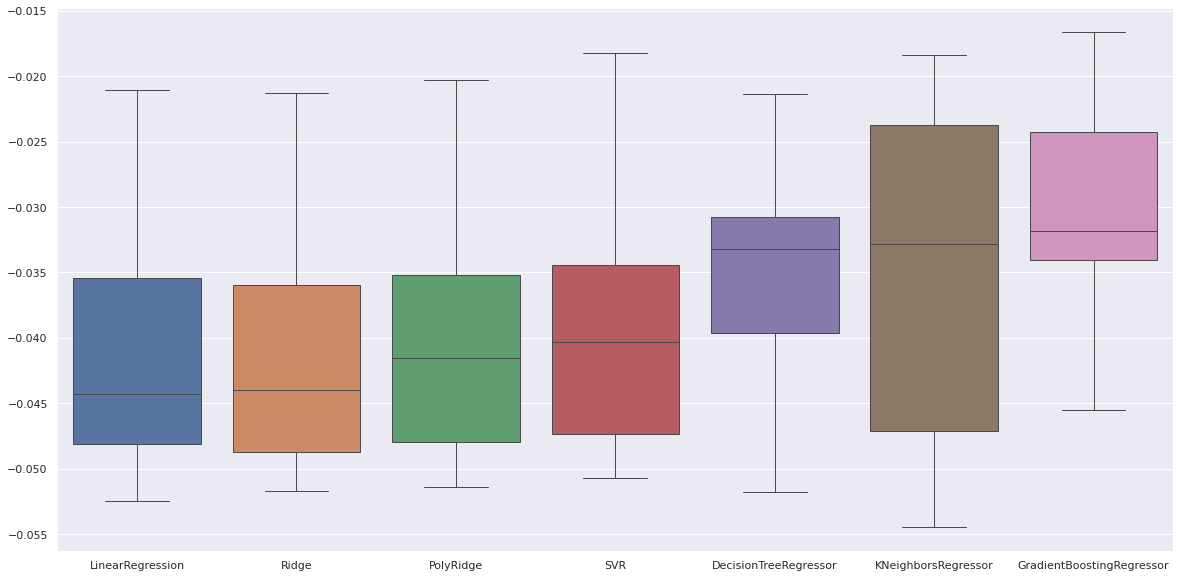

In [119]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data = scores_map)

We observe that the model GradientBoostingRegressor show better performance. 